In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def capture_image():
        cap = cv2.VideoCapture(0)
        if cap.isOpened():
            ret, frame = cap.read()
            cap.release()
            if ret:
                return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
   

In [13]:
def convert_to_hsv(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    return hsv, h, s, v


In [15]:
def hist_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    eq = cv2.equalizeHist(gray)
    return gray, eq

In [16]:
def binary_inversion_threshold(image, thresh=127):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, binary_inv = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY_INV)
    return binary_inv


In [17]:
def posterize_gray(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    bins = np.linspace(0, 256, 5)
    posterized = np.digitize(gray, bins) - 1
    posterized = (posterized * (255 // 3)).astype(np.uint8)
    return posterized

In [18]:
def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    
    scharr_x = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(gray, cv2.CV_64F, 0, 1)
    scharr = cv2.convertScaleAbs(cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0))
    return laplacian, scharr

In [19]:
def salt_pepper_and_median_filter(image, salt_prob=0.01, pepper_prob=0.01):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    noisy = gray.copy()
    num_salt = np.ceil(salt_prob * gray.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in gray.shape]
    noisy[coords[0], coords[1]] = 255
    num_pepper = np.ceil(pepper_prob * gray.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in gray.shape]
    noisy[coords[0], coords[1]] = 0
    median = cv2.medianBlur(noisy, 3)
    return noisy, median

In [20]:
def unsharp_mask(image, amount=1.5):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    sharpened = cv2.addWeighted(gray, 1 + amount, blurred, -amount, 0)
    return sharpened

In [21]:
def convert_to_lab(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    return lab, l, a, b

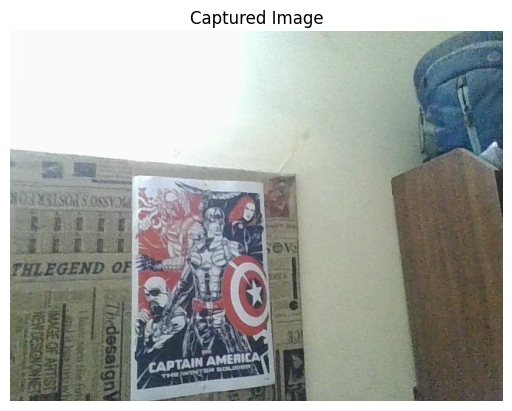

In [11]:
img = capture_image()
plt.imshow(img)
plt.title("Captured Image")
plt.axis('off')
plt.show()

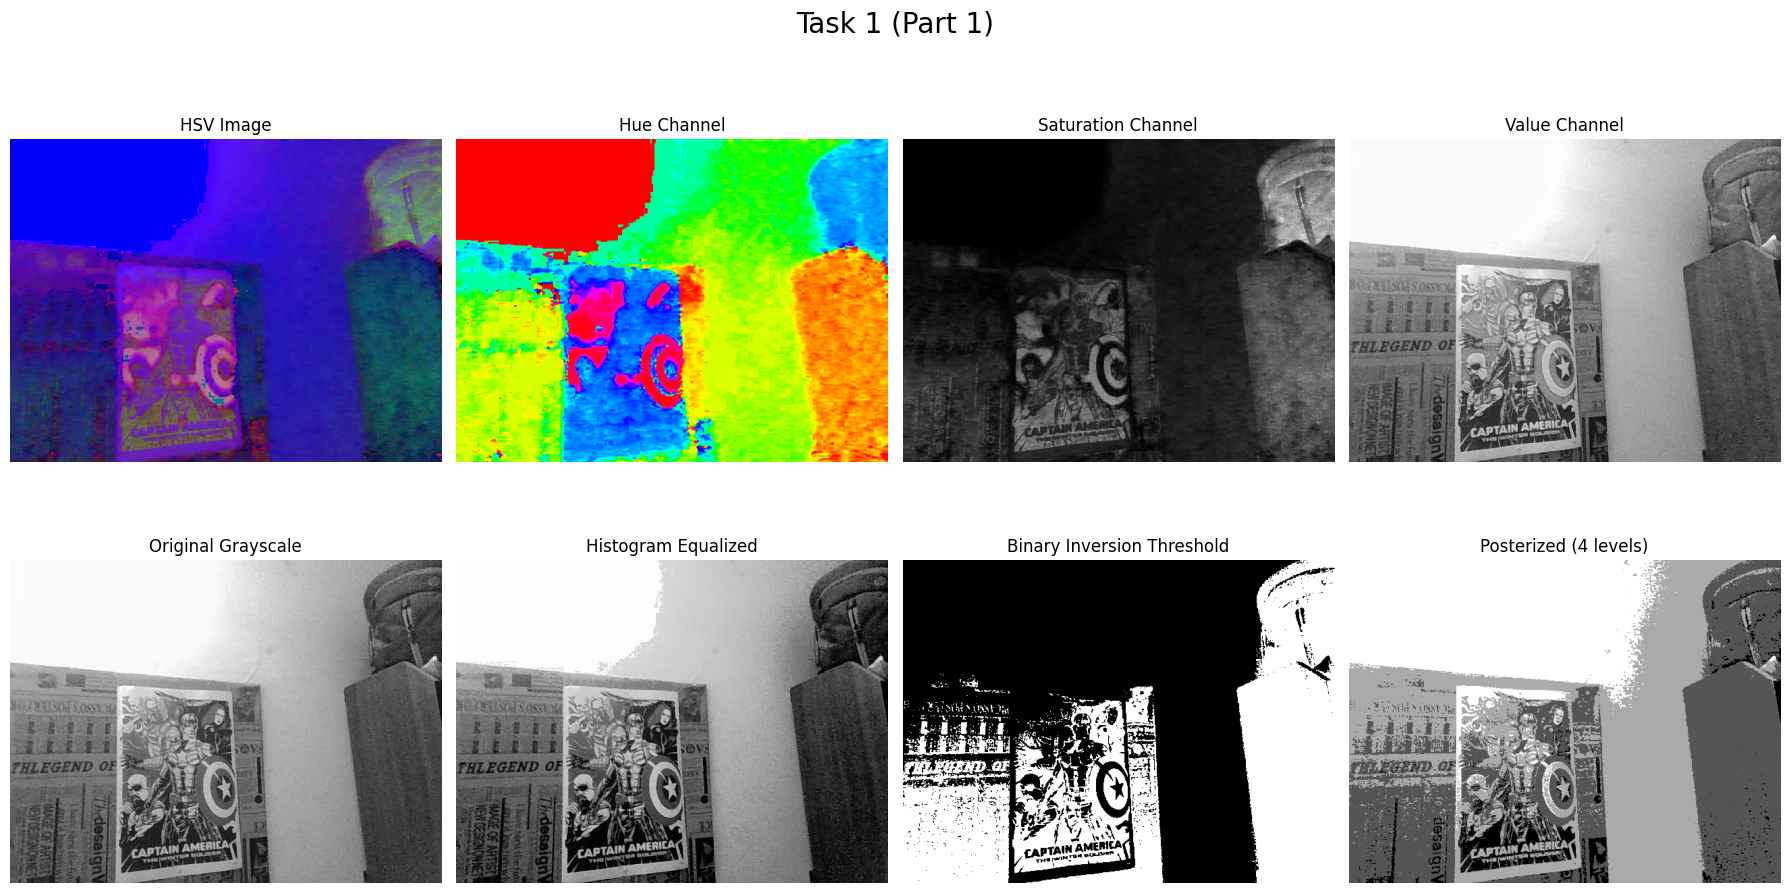

In [24]:
hsv, h, s, v = convert_to_hsv(img)
gray_orig, gray_eq = hist_equalization(img)
bin_inv = binary_inversion_threshold(img)

fig, axes = plt.subplots(2,4, figsize=(18,10))
fig.suptitle("Task 1 (Part 1)", fontsize=20)

axes[0,0].imshow(hsv)
axes[0,0].set_title("HSV Image")
axes[0,0].axis('off')

axes[0,1].imshow(h, cmap='hsv')
axes[0,1].set_title("Hue Channel")
axes[0,1].axis('off')

axes[0,2].imshow(s, cmap='gray')
axes[0,2].set_title("Saturation Channel")
axes[0,2].axis('off')

axes[0,3].imshow(v, cmap='gray')
axes[0,3].set_title("Value Channel")
axes[0,3].axis('off')

axes[1,0].imshow(gray_orig, cmap='gray')
axes[1,0].set_title("Original Grayscale")
axes[1,0].axis('off')

axes[1,1].imshow(gray_eq, cmap='gray')
axes[1,1].set_title("Histogram Equalized")
axes[1,1].axis('off')

axes[1,2].imshow(bin_inv, cmap='gray')
axes[1,2].set_title("Binary Inversion Threshold")
axes[1,2].axis('off')

posterized = posterize_gray(img)
axes[1,3].imshow(posterized, cmap='gray')
axes[1,3].set_title("Posterized (4 levels)")
axes[1,3].axis('off')

plt.tight_layout()
plt.show()


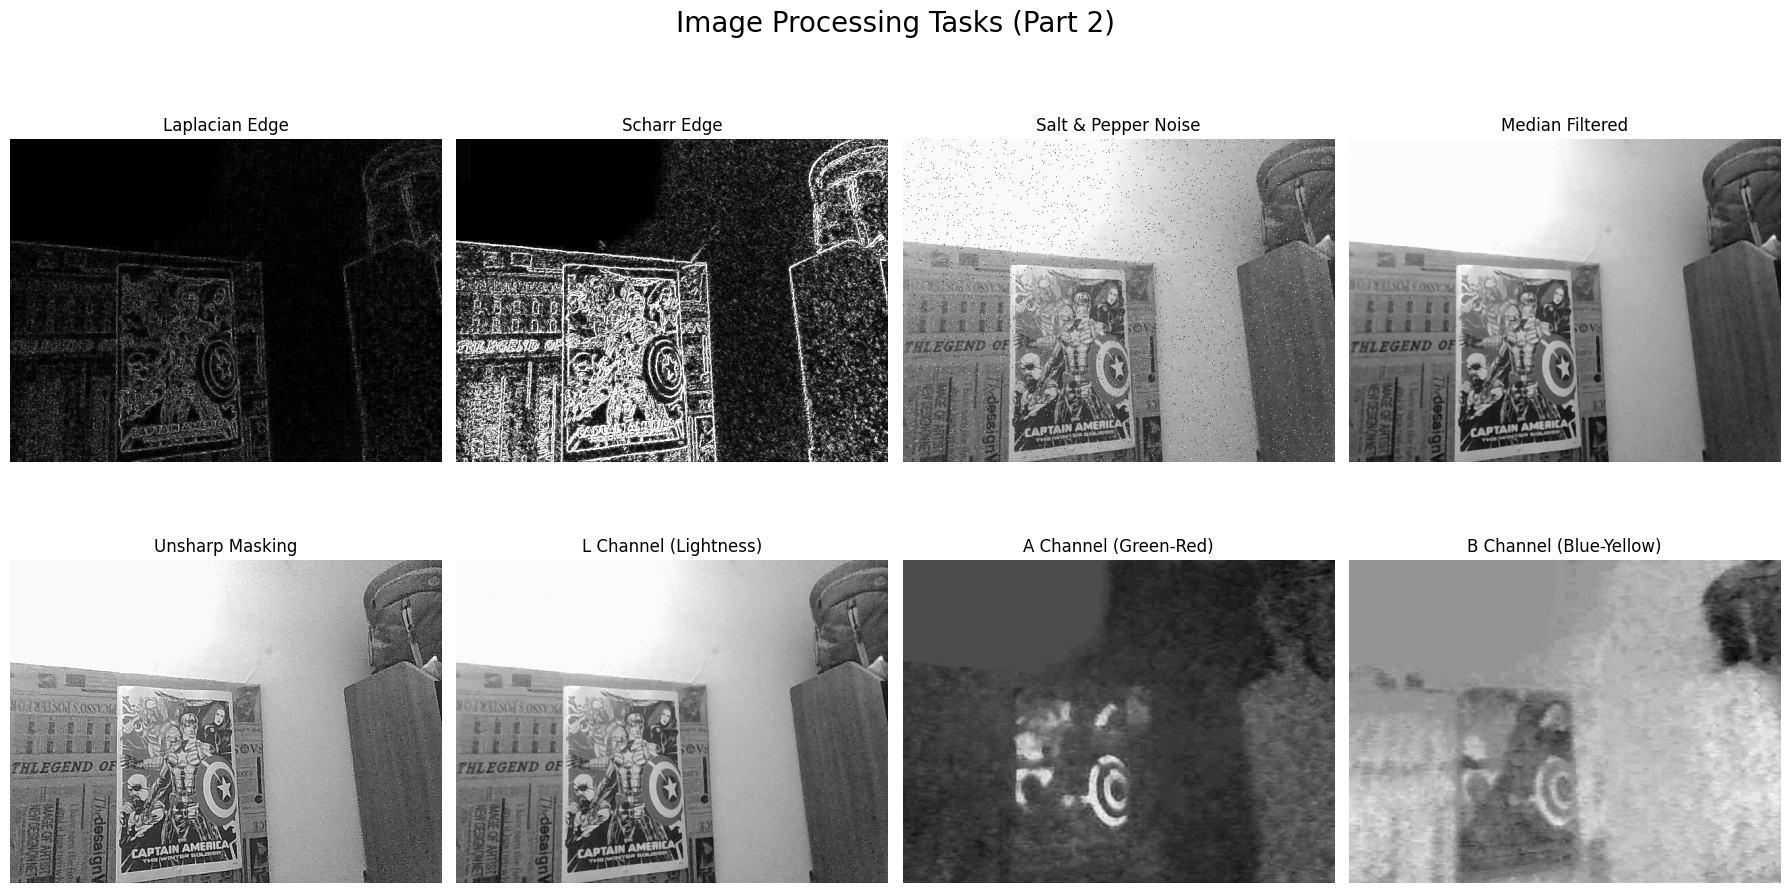

In [ ]:
laplacian, scharr = edge_detection(img)
noisy, median = salt_pepper_and_median_filter(img)
sharpened = unsharp_mask(img)
lab, l, a, b = convert_to_lab(img)

fig2, axes2 = plt.subplots(2,4, figsize=(18,10))
fig2.suptitle("Task 1 (Part 2)", fontsize=20)

axes2[0,0].imshow(laplacian, cmap='gray')
axes2[0,0].set_title("Laplacian Edge")
axes2[0,0].axis('off')

axes2[0,1].imshow(scharr, cmap='gray')
axes2[0,1].set_title("Scharr Edge")
axes2[0,1].axis('off')

axes2[0,2].imshow(noisy, cmap='gray')
axes2[0,2].set_title("Salt & Pepper Noise")
axes2[0,2].axis('off')

axes2[0,3].imshow(median, cmap='gray')
axes2[0,3].set_title("Median Filtered")
axes2[0,3].axis('off')

axes2[1,0].imshow(sharpened, cmap='gray')
axes2[1,0].set_title("Unsharp Masking")
axes2[1,0].axis('off')

axes2[1,1].imshow(l, cmap='gray')
axes2[1,1].set_title("L Channel (Lightness)")
axes2[1,1].axis('off')

axes2[1,2].imshow(a, cmap='gray')
axes2[1,2].set_title("A Channel (Green-Red)")
axes2[1,2].axis('off')

axes2[1,3].imshow(b, cmap='gray')
axes2[1,3].set_title("B Channel (Blue-Yellow)")
axes2[1,3].axis('off')

plt.tight_layout()
plt.show()


LAB separates luminance (L) from chrominance (A & B), which allows more precise color manipulation.

L (Lightness):
Controls brightness, from black (0) to white (100). It’s all about how light or dark the image looks.

A (Green–Red):
Shows color balance between green and red. Negative values lean green, positive lean red.

B (Blue–Yellow):
Balances between blue and yellow. Negative is blueish, positive is more yellowish.

